In [2]:
from bokeh.io import show, output_notebook
from bokeh.models import ColumnDataSource, GeoJSONDataSource, ColorBar, HoverTool, Legend, LinearColorMapper, ColorBar
from bokeh.plotting import figure
from bokeh.palettes import brewer
from bokeh.models.glyphs import Line
from bokeh.palettes import Category10, Viridis
output_notebook()
import panel as pn
import panel.widgets as pnw
pn.extension()
from mesa import Agent, Model
from mesa.time import RandomActivation
import random
%matplotlib inline
# The below is needed for both notebooks and scripts
import matplotlib.pyplot as plt
import numpy as np
from mesa.space import MultiGrid
import networkx as nx
from mesa.space import NetworkGrid
import time, enum, math
from mesa.datacollection import DataCollector
from mesa import Agent, Model
from mesa.time import RandomActivation
import random
%matplotlib inline
# The below is needed for both notebooks and scripts
import matplotlib.pyplot as plt
import numpy as np
from mesa.space import MultiGrid
import networkx as nx
from mesa.space import NetworkGrid
import time, enum, math
from mesa.datacollection import DataCollector
import pandas as pd

Loading BokehJS ...

In [3]:
df = pd.read_csv(r'D:/notebooks-baseline/datafile/COVID_AU_national_cumulative.csv')

In [4]:
df

,date,confirmed,deaths,tests,positives,recovered,hosp,icu,vent
0,1/25/2020,4,0,0,0,0,0,0,0
1,1/26/2020,4,0,0,0,0,0,0,0
2,1/27/2020,5,0,0,0,0,0,0,0
3,1/28/2020,5,0,0,0,0,0,0,0
4,1/29/2020,9,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
237,9/18/2020,26861,816,7224163,26861,23663,108,15,9
238,9/19/2020,26885,816,7263213,26885,23770,106,12,7
239,9/20/2020,26898,816,7296252,26898,23870,109,10,6
240,9/21/2020,26912,816,7319688,26912,23965,107,8,4


In [5]:
df['rate'] = df['confirmed']*100/25e6

In [6]:
df

,date,confirmed,deaths,tests,positives,recovered,hosp,icu,vent,rate
0,1/25/2020,4,0,0,0,0,0,0,0,0.000016
1,1/26/2020,4,0,0,0,0,0,0,0,0.000016
2,1/27/2020,5,0,0,0,0,0,0,0,0.000020
3,1/28/2020,5,0,0,0,0,0,0,0,0.000020
4,1/29/2020,9,0,0,0,0,0,0,0,0.000036
...,...,...,...,...,...,...,...,...,...,...
237,9/18/2020,26861,816,7224163,26861,23663,108,15,9,0.107444
238,9/19/2020,26885,816,7263213,26885,23770,106,12,7,0.107540
239,9/20/2020,26898,816,7296252,26898,23870,109,10,6,0.107592
240,9/21/2020,26912,816,7319688,26912,23965,107,8,4,0.107648


In [7]:
pb_a=0.01
pb_a_=0.99
z=[]
for pa in df['rate']: 
    z_= (pa*pb_a)/((pa*pb_a)+((1-pa)*pb_a_))
    z.append(z_)
df['falsenegative']=z
a=df['tests']
hs=[]
for i in range(len(a)):
    if i>0:
        h = a[i]-a[i-1]
        hs.append(h)
    else: 
        h=0
        hs.append(h)
df['dailytests']=hs
df['hiddencases']=(df['falsenegative']*df['dailytests']).astype('int')

In [13]:
a=df['confirmed']
hs=[]
for i in range(len(a)):
    if i>0:
        h = a[i]-a[i-1]
        hs.append(h)
    else: 
        h=0
        hs.append(h)
df['dailyconfirmed']=hs

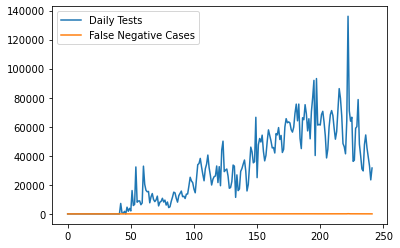

In [12]:
space = df.index
plt.plot(space,df['dailytests'],label='Daily Tests')
plt.plot(space,df['hiddencases'],label='False Negative Cases')
plt.legend()

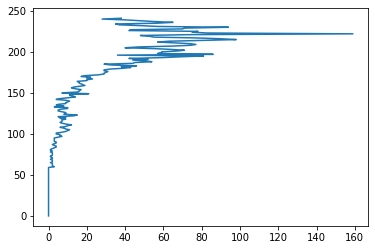

In [10]:
plt.plot(df['hiddencases'], df.index)

In [14]:
df

,date,confirmed,deaths,tests,positives,recovered,hosp,icu,vent,rate,falsenegative,dailytests,hiddencases,dailyconfirmed
0,1/25/2020,4,0,0,0,0,0,0,0,0.000016,1.616187e-07,0,0,0
1,1/26/2020,4,0,0,0,0,0,0,0,0.000016,1.616187e-07,0,0,0
2,1/27/2020,5,0,0,0,0,0,0,0,0.000020,2.020242e-07,0,0,1
3,1/28/2020,5,0,0,0,0,0,0,0,0.000020,2.020242e-07,0,0,0
4,1/29/2020,9,0,0,0,0,0,0,0,0.000036,3.636493e-07,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,9/18/2020,26861,816,7224163,26861,23663,108,15,9,0.107444,1.214461e-03,45422,55,48
238,9/19/2020,26885,816,7263213,26885,23770,106,12,7,0.107540,1.215676e-03,39050,47,24
239,9/20/2020,26898,816,7296252,26898,23870,109,10,6,0.107592,1.216334e-03,33039,40,13
240,9/21/2020,26912,816,7319688,26912,23965,107,8,4,0.107648,1.217042e-03,23436,28,14


In [44]:
hs

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 7214,
 794,
 363,
 1794,
 56,
 4635,
 1829,
 3811,
 2071,
 16097,
 5780,
 6556,
 32333,
 8060,
 8885,
 8989,
 6344,
 7550,
 32881,
 20410,
 16270,
 15242,
 15473,
 7654,
 11753,
 14025,
 9941,
 8471,
 9610,
 12253,
 5519,
 8037,
 8668,
 10766,
 8212,
 9501,
 6094,
 8195,
 4357,
 4884,
 8626,
 11527,
 14980,
 14486,
 10738,
 8108,
 12599,
 14218,
 15711,
 11887,
 12192,
 10614,
 13616,
 13731,
 19231,
 25227,
 22715,
 21524,
 17107,
 14542,
 23900,
 33893,
 34701,
 38206,
 32416,
 27247,
 22808,
 31098,
 34274,
 40517,
 31836,
 26474,
 19908,
 23836,
 25697,
 26117,
 32998,
 21580,
 32533,
 19408,
 44020,
 50098,
 29123,
 30178,
 30916,
 26030,
 17652,
 18167,
 22313,
 33629,
 32863,
 11396,
 26874,
 16053,
 17169,
 29270,
 31269,
 34327,
 37101,
 29702,
 15796,
 20198,
 33172,
 45978,
 42708,
 35173,
 35946,
 66525,
 24